## HENRY PI 03 - DATA ANALYST

In [73]:
### Librarys
import pandas as pd
import numpy as np

### Plott
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
#Loading data
cursera_co =pd.read_csv('datasets/Coursera_courses.csv')
cursera_re =pd.read_csv('datasets/Coursera_reviews.csv')
edx_co =pd.read_csv('datasets/edx_courses.csv')
udemy_co =pd.read_csv('datasets/udemy_courses.csv')

---

## CURSERA

First of all, we use methods "describe", "info" and "head" to get a general view of the datasets.


In [75]:
cursera_co.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [76]:
cursera_co.describe()

,name,institution,course_url,course_id
count,623,623,623,623
unique,622,134,623,623
top,Introduction to Psychology,University of Pennsylvania,https://www.coursera.org/learn/machine-learning,machine-learning
freq,2,43,1,1


In [77]:
cursera_co.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


In [78]:
cursera_co["course_url"].duplicated().sum()

0

---

In [79]:
#cursera reviews dataset
cursera_re.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [80]:
cursera_re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454571 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


In [81]:
cursera_re.duplicated().sum()

934764

In [82]:
cursera_re.duplicated("reviews").sum()

996433

In [83]:
df = cursera_re.loc[cursera_re['reviews'].duplicated(keep=False),'reviews']
df
df = df.groupby(df).apply(lambda x: tuple(x.index)).tolist()
df[0]

(842121, 842146, 842171)

In [84]:
#Lets check if those indexes are related to the same course
cursera_re.loc[[842121,842146,842171 ],['reviews', "rating"]]

,reviews,rating
842121,"\tAs a general feedback, first I would ask you...",5
842146,"\tAs a general feedback, first I would ask you...",5
842171,"\tAs a general feedback, first I would ask you...",5


We've now demonstrated that coursera_re dataset has plenty of duplicated reviews (same rating, same courses) We peoceed to drop them in order to use more accurate data

In [85]:
cursera_re.shape

(1454711, 5)

In [86]:
cursera_re.drop_duplicates(subset='reviews', inplace=True)

In [87]:
cursera_re.shape

(458278, 5)

In [88]:
#We must check if the rating range is standarized from 1 to 5:
cursera_re["rating"].describe()

count    458278.000000
mean          4.670244
std           0.734659
min           1.000000
25%           5.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

Now the duplicates are gone, lets see if we can combine both coursera dataframes by the "course_ID" column

In [89]:
cursera_re.rename(columns = {"course_id" : "course_id_re"}, inplace=True)   #rename id from cursera_re DF
cursera_df = cursera_co.merge(cursera_re, left_on = "course_id", right_on= "course_id_re")  #merging both dataframes
cursera_df

,name,institution,course_url,course_id,reviews,reviewers,date_reviews,rating,course_id_re
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This is an extremely basic course. Machine lea...,By Deleted A,"Mar 18, 2017",1,machine-learning
1,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,The course is ok but the certification procedu...,By Bruno C,"Nov 09, 2015",1,machine-learning
2,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"I just started week 3 , I have to admit that I...",By Fadi,"Apr 15, 2019",1,machine-learning
3,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This course is absolute garbage. You get no f...,By Mathew L,"Sep 25, 2015",1,machine-learning
4,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"However good the material and lectures may be,...",By Rui C,"Dec 12, 2015",1,machine-learning
...,...,...,...,...,...,...,...,...,...
458273,Managing as a Coach,"University of California, Davis",https://www.coursera.org/learn/managing-as-a-c...,managing-as-a-coach,Was an eye opener.,By JN V,"Nov 15, 2018",5,managing-as-a-coach
458274,Managing as a Coach,"University of California, Davis",https://www.coursera.org/learn/managing-as-a-c...,managing-as-a-coach,good to attempt!!,By Ashish P,"Feb 13, 2019",5,managing-as-a-coach
458275,Managing as a Coach,"University of California, Davis",https://www.coursera.org/learn/managing-as-a-c...,managing-as-a-coach,Really useful!!,By Estella W,"Aug 23, 2018",5,managing-as-a-coach
458276,Managing as a Coach,"University of California, Davis",https://www.coursera.org/learn/managing-as-a-c...,managing-as-a-coach,For Good Coach,By Snehal K,"Mar 10, 2016",5,managing-as-a-coach


In [90]:
cursera_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458278 entries, 0 to 458277
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   name          458278 non-null  object
 1   institution   458278 non-null  object
 2   course_url    458278 non-null  object
 3   course_id     458278 non-null  object
 4   reviews       458277 non-null  object
 5   reviewers     458278 non-null  object
 6   date_reviews  458278 non-null  object
 7   rating        458278 non-null  int64 
 8   course_id_re  458278 non-null  object
dtypes: int64(1), object(8)
memory usage: 35.0+ MB


---

---

## EDX

In [91]:
edx_co.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


In [92]:
edx_co.describe()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
count,975,922,855,975,975,972,975,975,975,972,975,975,975,935,417,975
unique,972,887,849,2,111,775,3,31,9,33,53,18,47,932,412,974
top,Introduction to Probability,This course is part of a MicroMasters® Program,"97,291",Self-paced on your time,Harvard University,Rafael Irizarry,Introductory,Computer Science,English,English,2–4 hours per week,4 Weeks,FREE-Add a Verified Certificate for $49 USD,"About the Database Series of Courses""Databases...",Course Outline:,https://www.edx.org/course/introduction-to-pro...
freq,2,15,2,917,104,9,621,166,777,713,108,194,270,3,3,2


---

## UDEMY

In [93]:
udemy_co.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [94]:
udemy_co.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


---

## CURSERA

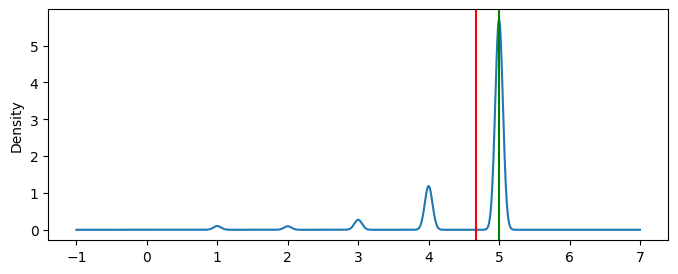

In [95]:
#Plotting the distribution of "rating" for Coursera
ax = cursera_df['rating'].plot(kind='density', figsize=(8,3)) 
ax.axvline(cursera_df['rating'].mean(), color='red')
ax.axvline(cursera_df['rating'].median(), color='green')

The mean is nearly 5, and median is between 4 and 5...

Therefore, we can confirm that the mayority of cursera´s courses are rated >= 4

Let´s see if we can find out if "rating" has any relation with the "institution" type (university or not)

In [96]:
len(cursera_df["institution"].unique())

132

There are 132 differnt institution in cursera´s DF, let´s see if we can separete the univeristy institutions from the rest.

In [97]:
#Create "university" column, and place a YES where institution has "university" 
cursera_df.loc[cursera_df['institution'].str.contains('University'), 'university'] = "Yes"  
#Now replace NO where university is False
cursera_df["university"].fillna(value= "No", inplace=True) 

In [98]:
#checking the output
cursera_df["university"].unique()

array(['Yes', 'No'], dtype=object)

In [99]:
cursera_university = (cursera_df[cursera_df["university"] == "Yes"])
cursera_other = (cursera_df[cursera_df["university"] == "No"])

In [112]:
#University mean
print(cursera_university['rating'].mean())
#Other mean
print(cursera_other['rating'].mean())

4.687412390413772
4.6393334433261835


At this point it seems that even if the course is related to a univeristy, this doesnt impact on rating's mean

In [135]:
cursera_df.head()

,name,institution,course_url,course_id,reviews,reviewers,date_reviews,rating,course_id_re,university
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This is an extremely basic course. Machine lea...,By Deleted A,"Mar 18, 2017",1,machine-learning,Yes
1,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,The course is ok but the certification procedu...,By Bruno C,"Nov 09, 2015",1,machine-learning,Yes
2,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"I just started week 3 , I have to admit that I...",By Fadi,"Apr 15, 2019",1,machine-learning,Yes
3,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This course is absolute garbage. You get no f...,By Mathew L,"Sep 25, 2015",1,machine-learning,Yes
4,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"However good the material and lectures may be,...",By Rui C,"Dec 12, 2015",1,machine-learning,Yes


In [137]:
cursera_university["reviewers"].value_counts()

By Deleted A      1122
By Muhammad A      118
By David M          92
By Michael S        92
By David S          88
                  ... 
By TEJAS A           1
By isha d            1
By Simone b          1
By Muzemil M M       1
By Estella W         1
Name: reviewers, Length: 184418, dtype: int64

In [132]:
#Top 5 university courses (by rating)
cursera_university.groupby(["institution"]).mean().sort_values(by="rating", ascending=False).head(5)

C:\Users\amysl\AppData\Local\Temp\ipykernel_7212\3984525783.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cursera_university.groupby(["institution"]).mean().sort_values(by="rating", ascending=False).head(5)


,rating
institution,
University of Rochester,4.911765
Arizona State University,4.897756
Hebrew University of Jerusalem,4.893617
The University of Chicago,4.892178
University of Arizona,4.881379


Notice that 4 of the top 5 ratings come from a USA university

In [133]:
#Top 5 no university courses (by rating)
cursera_other.groupby(["institution"]).mean().sort_values(by="rating", ascending=False).head(5)

C:\Users\amysl\AppData\Local\Temp\ipykernel_7212\1460054631.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cursera_other.groupby(["institution"]).mean().sort_values(by="rating", ascending=False).head(5)


,rating
institution,
GitLab,5.000000
Universidade Estadual de Campinas,4.919725
Universidad de los Andes,4.890560
London Business School,4.873563
SAS,4.869565


In [130]:
#Top 5 courses (by rating)
cursera_df.groupby(["name"]).mean().sort_values(by="rating", ascending=False).head(5)

C:\Users\amysl\AppData\Local\Temp\ipykernel_7212\1771504001.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cursera_df.groupby(["name"]).mean().sort_values(by="rating", ascending=False).head(5)


,rating
name,
Entreprise et changement climatique,5.000000
Building Modern Python Applications on AWS,5.000000
How to Manage a Remote Team,5.000000
Removing Barriers to Change,5.000000
El Abogado del Futuro: Legaltech y la Transformación Digital del Derecho,4.974359


---

---

## EDX

In [ ]:
edx_co.head(2)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,course_description,course_syllabus,course_url,price_certificate
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online,49.0
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...,49.0


First, let's get the certificate price in a separate column named "price_certificate" (remember that all the courses are FREE, and you can add a certificate for a determined price)

In [ ]:
edx_co["price_usd"] = edx_co["price"].str.split(pat="$").str.get(1)
edx_co["price_usd2"] = edx_co["price_usd"].str.split(" USD").str.get(0)
edx_co.drop(columns = ["price_usd", "price"], inplace=True)
edx_co.rename( columns = {"price_usd2" : "price_certificate"}, inplace= True)
edx_co["price_certificate"] = edx_co["price_certificate"].astype(str).astype(float)

We should convert n_enrolled dtype "Object" to "INT" for further analysis

If there are any NaN in the n_enrolled column, we should drop them (no number enrolled = no consuming = no info for us here)

In [ ]:
edx_co["n_enrolled"].isnull().sum()

120

We drop the 120 n_enrolled null values

In [ ]:
edx_co.drop_duplicates(subset='n_enrolled', inplace=True)

Change dtype

In [ ]:
edx_co["n_enrolled"]=edx_co["n_enrolled"].str.replace(',','')
edx_co["n_enrolled"] = edx_co["n_enrolled"].astype(str).astype(float)
edx_co["n_enrolled"] = edx_co["n_enrolled"].astype(float).astype(int)

Separeting "course_effort" and "course_length" will let us know if this variables have antything to do with the "n_enrolled" (we suspect so...)

Intuitively, the greater the effort and length the less enrolled students.. let's check it out!

In [ ]:
#First we split the range of hours
edx_co["course_effort_hours"] = edx_co["course_effort"].str.split(" hours per week").str.get(0)
#Now we separete the min from the max 
edx_co["course_effort_hours_min"] = edx_co["course_effort_hours"].str.split("–").str.get(0)
edx_co["course_effort_hours_max"] = edx_co["course_effort_hours"].str.split("–").str.get(1)
#Turn them into Integer so we can get the mean
edx_co["course_effort_hours_min"] =edx_co["course_effort_hours_min"].astype(str).astype(int)
edx_co["course_effort_hours_max"] =edx_co["course_effort_hours_max"].astype(str).astype(int)

Creating a "course_effort_mean" will show us the average hours a student should dedicate to each course:

In [ ]:
edx_co["course_effort_mean"] = ( edx_co["course_effort_hours_min"] + edx_co["course_effort_hours_max"] ) / 2

#Remember that the mean is in "hours"

In [ ]:
#Now we can drop the min and max columns
edx_co.drop(columns = ["course_effort_hours_min", "course_effort_hours_max"], inplace=True)

Now, for the "course_length" column...

In [ ]:
#Splitting: 
edx_co["course_length_weeks"] = edx_co["course_length"].str.split(" Weeks").str.get(0)
#Now turn it to a integer type: 
edx_co["course_length_weeks"] =edx_co["course_length_weeks"].astype(str).astype(int)

In [ ]:
edx_co.head(2)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,course_description,course_syllabus,course_url,price_certificate,course_effort_hours,course_effort_mean,course_length_weeks
0,How to Learn Online,Learn essential strategies for successful onli...,124980.0,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online,49.0,2–3,2.5,2
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864.0,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...,49.0,2–4,3.0,7


(array([313., 121., 145., 144.,  79.,  27.,  13.,   3.,   4.,   1.]),
 array([  5. ,  49.5,  94. , 138.5, 183. , 227.5, 272. , 316.5, 361. ,
        405.5, 450. ]),
 <BarContainer object of 10 artists>)

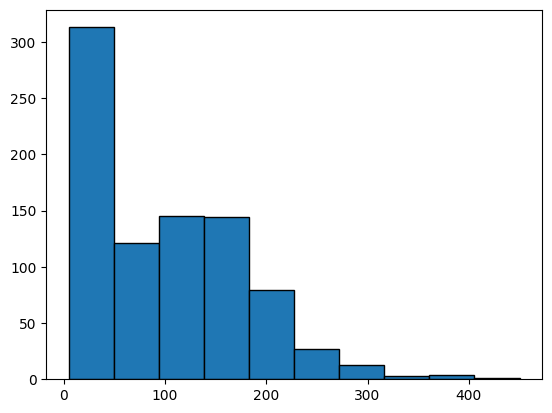

In [ ]:
#Lets check out some distribuition por "price certificate"
plt.hist(x = edx_co["price_certificate"], bins=10, edgecolor="black")

Logically, the mayority of certificates are close to the 20 to 50 USD$ price

Conitnue exploring data...

In [ ]:
edx_co["institution"].value_counts()
#Harvard university is the institute with the highest amount of courses

Harvard University                                                        103
Universitat Politècnica de Valencia                                        45
Massachusetts Institute of Technology                                      37
Delft University of Technology                                             28
Inter-American Development Bank                                            27
                                                                         ... 
University System of Maryland-The University of Maryland, College Park      1
University of Oxford                                                        1
Davidson College                                                            1
Educational Testing Service                                                 1
University of Baltimore-University System of Maryland                       1
Name: institution, Length: 106, dtype: int64

<AxesSubplot:xlabel='course_effort_mean', ylabel='n_enrolled'>

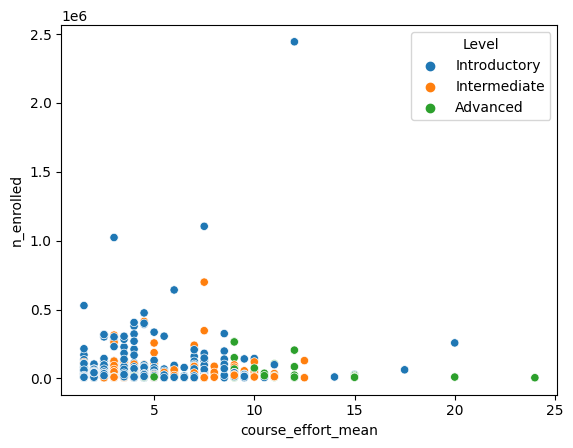

In [ ]:
sns.scatterplot(x = "course_effort_mean", y = "n_enrolled", data = edx_co, hue="Level")

As we can see, the more advanced level the course is, the less enrolled students. Also, the course effort increases...

C:\Users\amysl\AppData\Local\Temp\ipykernel_22624\2524992735.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(edx_co.corr(), annot=True, cmap="coolwarm")


<AxesSubplot:>

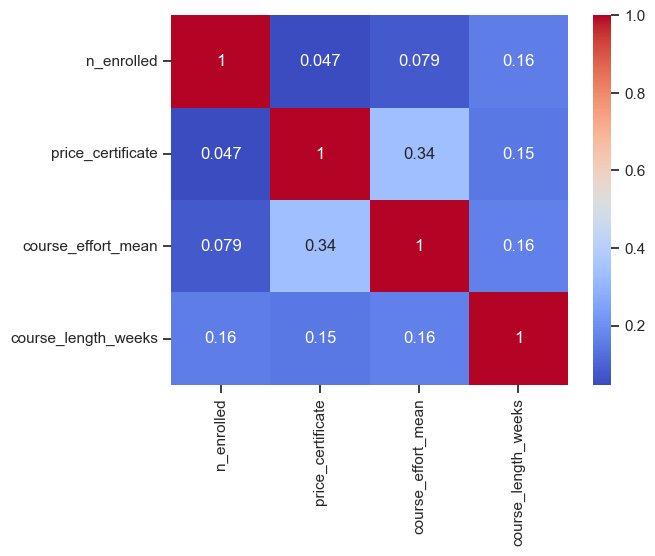

In [ ]:
#Heatmap to see some correlation
sns.heatmap(edx_co.corr(), annot=True, cmap="coolwarm")

Again, courses where more effort is demanded have higher price certificate

---

---

## UDEMY

In [ ]:
udemy_co.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [160]:
udemy_co["content_duration"].describe()

count    3678.000000
mean        4.094517
std         6.053840
min         0.000000
25%         1.000000
50%         2.000000
75%         4.500000
max        78.500000
Name: content_duration, dtype: float64

In [ ]:
#For further analysis we will set the minum "content_duration" to 1 hour 
udemy_co["content_duration"] = np.where((udemy_co["content_duration"] < 1), 1, udemy_co["content_duration"])

In [ ]:
#check if the dtypes are correct
udemy_co.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


For later exploratory analysis, we should split the "published_timestamp" into a date and time columns

In [161]:
# convert to pandas timestamp (since "published_timestamp" is an "object" type)
udemy_co['published_timestamp'] = pd.to_datetime(udemy_co.published_timestamp)
#split columns
udemy_co['published_date'] = udemy_co['published_timestamp'].dt.date
udemy_co['published_time'] = udemy_co['published_timestamp'].dt.time
#drop the "published_timestamp" 
udemy_co.drop(columns = ['published_timestamp'], inplace=True)
#split the year from "published date" in separate column
udemy_co['published_year'] = udemy_co['published_date'].astype(str).str.split("-").str.get(0)
#split the month from "published date" in separate column
udemy_co['published_month'] = udemy_co['published_date'].astype(str).str.split("-").str.get(1)

In [162]:
udemy_co.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,published_date,published_time,published_year,published_month
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,Business Finance,2017-01-18,20:58:58,2017,01
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,Business Finance,2017-03-09,16:34:20,2017,03


Create a column named "reveneu" (price * num_subscribers) for the "is_paid" == True group:

In [164]:
udemy_co["reveneu"] = np.where((udemy_co["is_paid"] == True), (udemy_co["price"] * udemy_co["num_subscribers"]), 0)

C:\Users\amysl\AppData\Local\Temp\ipykernel_7212\1978955968.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(udemy_co.corr(), annot=True, cmap="coolwarm")


<AxesSubplot:>

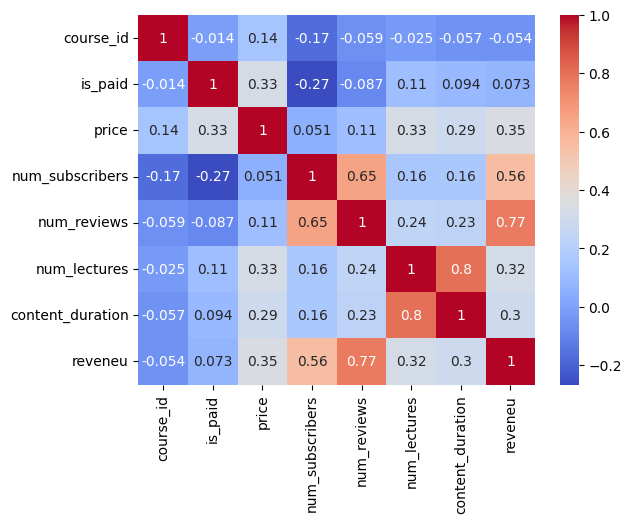

In [165]:
#Heatmap correlation
sns.heatmap(udemy_co.corr(), annot=True, cmap="coolwarm")

Content_duration and num_lectures are positively related

More susbcribers means more reviews

Finally, both suscribers and reviews are related to reveneu

Subject related:

In [167]:
subject_value = udemy_co["subject"].value_counts()
subject_value.index

Index(['Web Development', 'Business Finance', 'Musical Instruments',
       'Graphic Design'],
      dtype='object')

<BarContainer object of 4 artists>

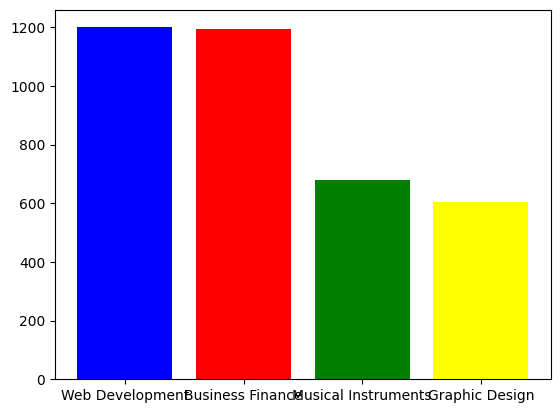

In [ ]:
#Subject distribuition (number of courses per subject)
plt.bar(x = subject_value.index, height= subject_value, color = ["blue", "red", "green", "yellow"])

In [ ]:
#Difffernt type of levels:
udemy_co["level"].value_counts()

All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

Lets see which "subject" has more subscribers:

For the price normal distribution:

<AxesSubplot:>

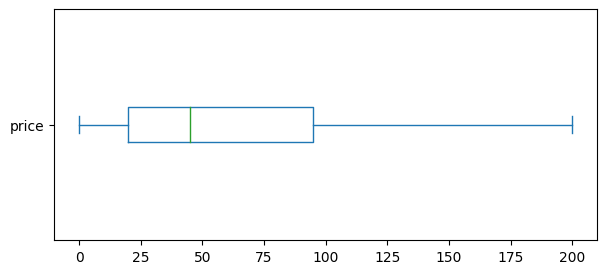

In [ ]:
udemy_co["price"].plot(kind = "box", vert = False, figsize= (7,3))

<AxesSubplot:xlabel='price', ylabel='Count'>

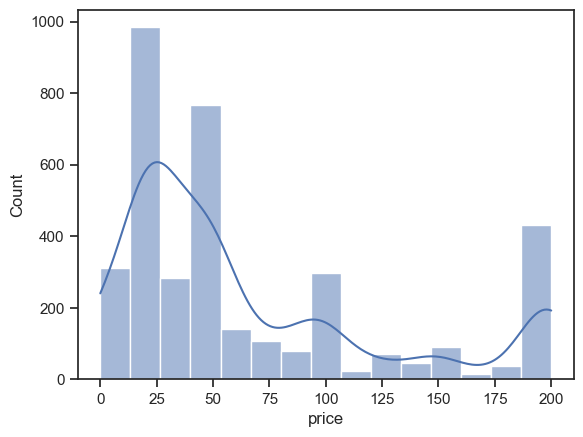

In [ ]:
sns.histplot(udemy_co["price"], kde=True, bins=15)

In [ ]:
udemy_co["price"].describe()

count    3678.000000
mean       66.049483
std        61.005755
min         0.000000
25%        20.000000
50%        45.000000
75%        95.000000
max       200.000000
Name: price, dtype: float64

---

Now that our first analysis has been made, we will continue in the Power BI software (Provide better tools for visualization)

In order to do so, we export the new transformed CSV's

In [ ]:
curserav2 = cursera_df
udemyv2 = udemy_co
edxv2 = edx_co

In [ ]:
#Export final CSV
curserav2.to_csv('datasets\curserav2.csv', index=False)
udemyv2.to_csv('datasets\\udemyv2.csv', index=False)
edxv2.to_csv('datasets\edxv2.csv', index=False)